# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

for i, city in enumerate(cities):
    #print(city)
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = "{base_url}?q={city_name}&units={units}&appid={appid}".format(base_url=base_url,city_name=city,units="metric",appid=weather_api_key)
    #print(city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        
        response = requests.get(city_url)
        city_weather = response.json()
        #print(city_weather)
    
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]['lat']
        city_lng = city_weather["coord"]['lon']
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        #dt = city_weather["dt"]
        #city_date = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(dt))
        #city_date = time.strftime("%m-%d-%Y", time.localtime(dt))
        city_date = city_weather["dt"]
        #print(f"City Date: {city_date}")
        # Append the City information into city_data list
        city_data.append({"City": city,
                      "Lat": city_lat,
                      "Lng": city_lng,
                      "Max Temp": city_max_temp,
                      "Humidity": city_humidity,
                      "Cloudiness": city_clouds,
                      "Wind Speed": city_wind,
                      "Country": city_country,
                      "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)
  
#print(city_data)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | sturgis
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | anadyr
Processing Record 5 of Set 1 | iskateley
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | mount gambier
Processing Record 8 of Set 1 | el hadjira
Processing Record 9 of Set 1 | port mathurin
Processing Record 10 of Set 1 | aykhal
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | broome
Processing Record 13 of Set 1 | geraldton
Processing Record 14 of Set 1 | nikolayevsk-on-amure
Processing Record 15 of Set 1 | fort st. john
Processing Record 16 of Set 1 | papatowai
Processing Record 17 of Set 1 | bikenibeu village
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | i-n-salah
Processing Record 20 of Set 1 | remire-montjoly
Processing Record 21 of Set 1 | port elizabeth
Proces

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  \
0                     waitangi -43.9535 -176.5597     11.57        92   
1                      sturgis  41.7992  -85.4192     -4.40        71   
2  edinburgh of the seven seas -37.0676  -12.3116     15.18        67   
3                       anadyr  64.7500  177.4833    -23.72        76   
4                    iskateley  67.6803   53.1512     -0.76        93   

   Cloudiness  Wind Speed Country        Date  
0         100        0.45      NZ  1738939659  
1          20        4.12      US  1738939660  
2          34        6.86      SH  1738939661  
3          40        2.00      RU  1738939662  
4         100       10.70      RU  1738939663

In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  \
City_ID                                                                       
0                           waitangi -43.9535 -176.5597     11.57        92   
1                            sturgis  41.7992  -85.4192     -4.40        71   
2        edinburgh of the seven seas -37.0676  -12.3116     15.18        67   
3                             anadyr  64.7500  177.4833    -23.72        76   
4                          iskateley  67.6803   53.1512     -0.76        93   

         Cloudiness  Wind Speed Country        Date  
City_ID                                              
0               100        0.45      NZ  1738939659  
1                20        4.12      US  1738939660  
2                34        6.86      SH  1738939661  
3                40        2.00      RU  1738939662  
4               100       10.70      RU  1738939663

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

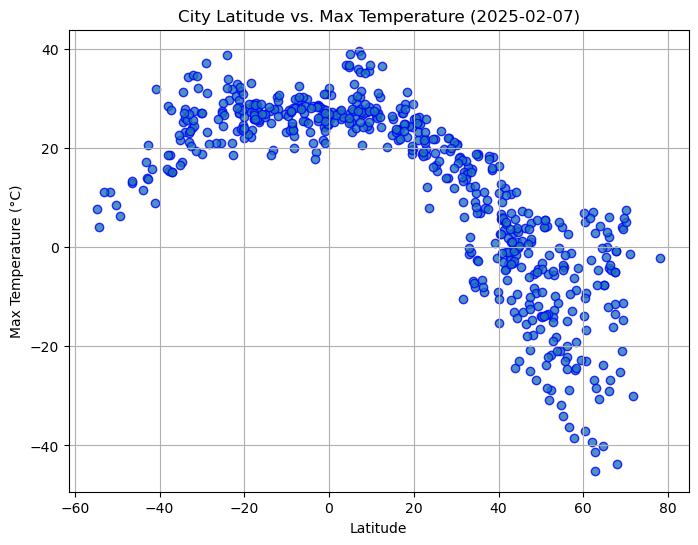

In [17]:
# Build scatter plot for latitude vs. temperature
dt = city_data_df.loc[0, 'Date']
city_date = time.strftime("%Y-%m-%d", time.localtime(dt))

plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=0.8, edgecolors="b")
plt.title(f"City Latitude vs. Max Temperature ({city_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Â°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

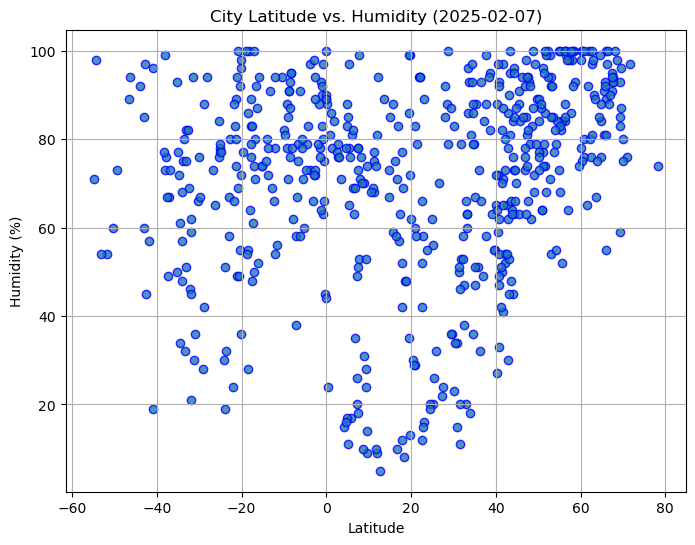

In [19]:
# Build the scatter plots for latitude vs. humidity
dt = city_data_df.loc[0, 'Date']
city_date = time.strftime("%Y-%m-%d", time.localtime(dt))

plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=0.8, edgecolors="b")
plt.title(f"City Latitude vs. Humidity ({city_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

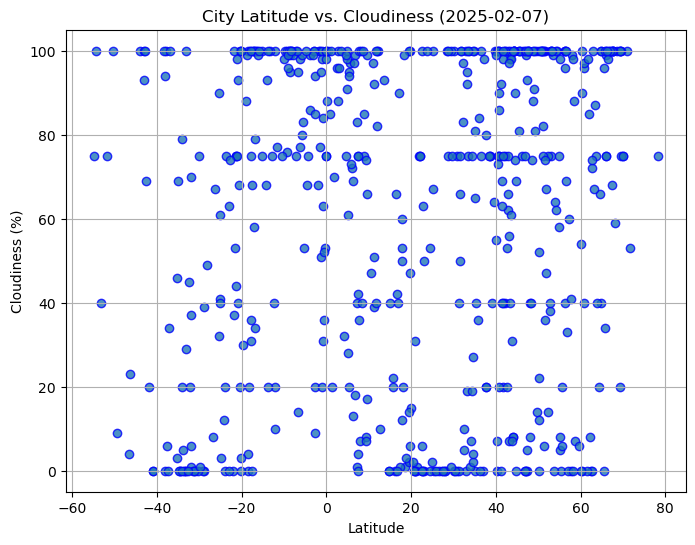

In [21]:
# Build the scatter plots for latitude vs. cloudiness
dt = city_data_df.loc[0, 'Date']
city_date = time.strftime("%Y-%m-%d", time.localtime(dt))

plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=0.8, edgecolors="b")
plt.title(f"City Latitude vs. Cloudiness ({city_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

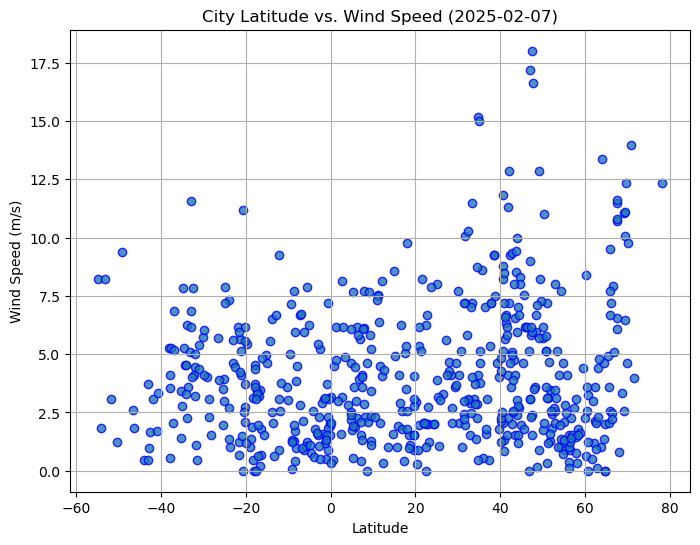

In [23]:
# Build the scatter plots for latitude vs. wind speed
dt = city_data_df.loc[0, 'Date']
city_date = time.strftime("%Y-%m-%d", time.localtime(dt))

plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=0.8, edgecolors="b")
plt.title(f"City Latitude vs. Wind Speed ({city_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) > 0, :]


# Display sample data
northern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                  
1           sturgis  41.7992  -85.4192     -4.40        71          20   
3            anadyr  64.7500  177.4833    -23.72        76          40   
4         iskateley  67.6803   53.1512     -0.76        93         100   
7        el hadjira  32.6134    5.5126     15.29        47          10   
9            aykhal  66.0000  111.5000    -28.97       100          99   

         Wind Speed Country        Date  
City_ID                                  
1              4.12      US  1738939660  
3              2.00      RU  1738939662  
4             10.70      RU  1738939663  
7              3.02      DZ  1738939667  
9              2.58      RU  1738939669

In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]

# Display sample data
southern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  \
City_ID                                                                       
0                           waitangi -43.9535 -176.5597     11.57        92   
2        edinburgh of the seven seas -37.0676  -12.3116     15.18        67   
5                      blackmans bay -43.0167  147.3167     14.07        85   
6                      mount gambier -37.8333  140.7667     15.34        76   
8                      port mathurin -19.6833   63.4167     28.04        77   

         Cloudiness  Wind Speed Country        Date  
City_ID                                              
0               100        0.45      NZ  1738939659  
2                34        6.86      SH  1738939661  
5               100        0.45      AU  1738939665  
6               100        3.53      AU  1738939666  
8                30        5.42      MU  1738939668

###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is -0.8331727892332196


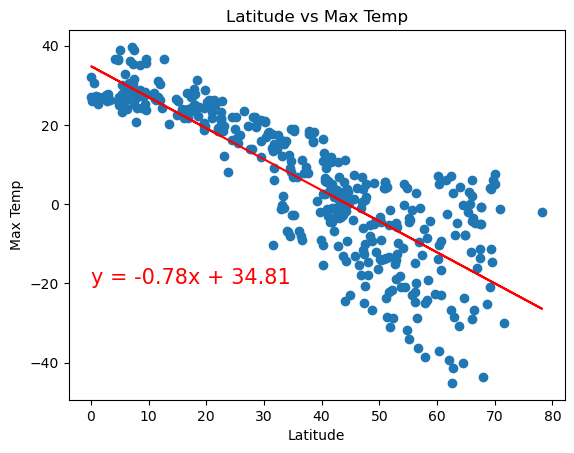

In [37]:
# Linear regression on Northern Hemisphere
xvalues = northern_hemi_df["Lat"]
yvalues = northern_hemi_df["Max Temp"]
slope = linregress(xvalues, yvalues)
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(xvalues, yvalues)
plt.plot(xvalues, regress_values, "-r")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
plt.title("Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r^2-value is {rvalue}')
plt.savefig("output_data/Fig5.png")

# Show plot
plt.show()

The r^2-value is 0.4909778128571515


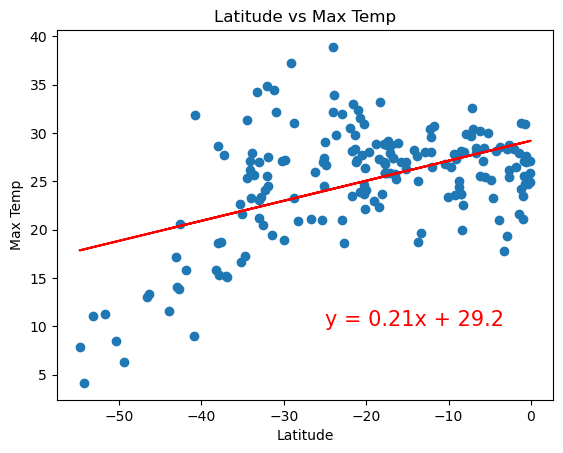

In [39]:
# Linear regression on Southern Hemisphere
xvalues = southern_hemi_df["Lat"]
yvalues = southern_hemi_df["Max Temp"]
slope = linregress(xvalues, yvalues)
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(xvalues, yvalues)
plt.plot(xvalues, regress_values, "-r")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.title("Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r^2-value is {rvalue}')
plt.savefig("output_data/Fig6.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is 0.4555708337436959


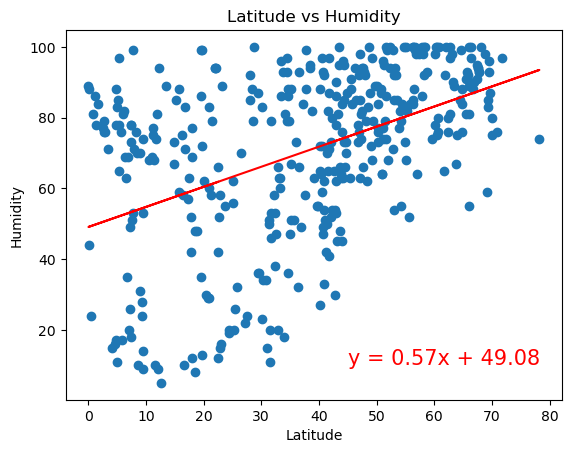

In [41]:
# Northern Hemisphere
xvalues = northern_hemi_df["Lat"]
yvalues = northern_hemi_df["Humidity"]
slope = linregress(xvalues, yvalues)
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(xvalues, yvalues)
plt.plot(xvalues, regress_values, "-r")
plt.annotate(line_eq,(45, 10),fontsize=15,color="red")
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r^2-value is {rvalue}')
plt.savefig("output_data/Fig7.png")

# Show plot
plt.show()

The r^2-value is 0.2395020546645813


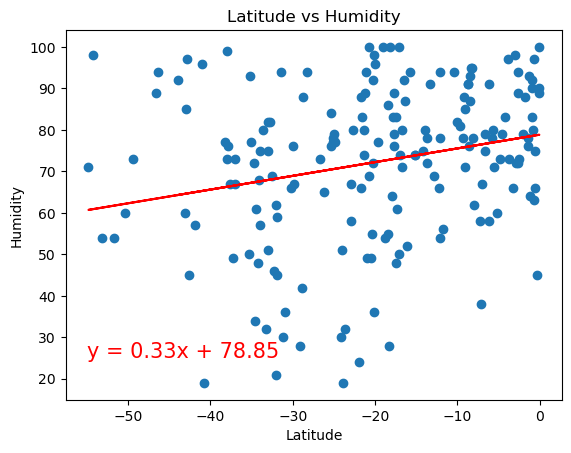

In [47]:
# Southern Hemisphere
xvalues = southern_hemi_df["Lat"]
yvalues = southern_hemi_df["Humidity"]
slope = linregress(xvalues, yvalues)
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(xvalues, yvalues)
plt.plot(xvalues, regress_values, "-r")
plt.annotate(line_eq,(-55, 25),fontsize=15,color="red")
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r^2-value is {rvalue}')
plt.savefig("output_data/Fig8.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is 0.132955756813494


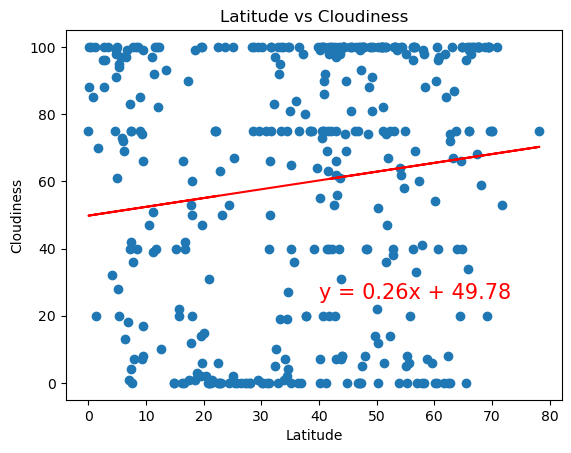

In [61]:
# Northern Hemisphere
xvalues = northern_hemi_df["Lat"]
yvalues = northern_hemi_df["Cloudiness"]
slope = linregress(xvalues, yvalues)
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(xvalues, yvalues)
plt.plot(xvalues, regress_values, "-r")
plt.annotate(line_eq,(40, 25),fontsize=15,color="red")
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r^2-value is {rvalue}')
plt.savefig("output_data/Fig9.png")

# Show plot
plt.show(

The r^2-value is 0.3764923819266079


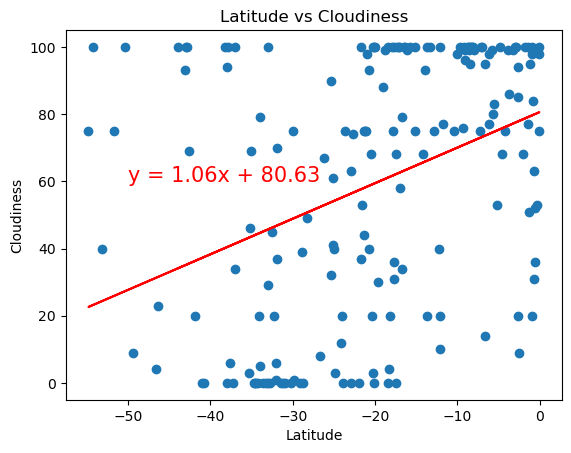

In [57]:
# Southern Hemisphere
xvalues = southern_hemi_df["Lat"]
yvalues = southern_hemi_df["Cloudiness"]
slope = linregress(xvalues, yvalues)
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(xvalues, yvalues)
plt.plot(xvalues, regress_values, "-r")
plt.annotate(line_eq,(-50, 60),fontsize=15,color="red")
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r^2-value is {rvalue}')
plt.savefig("output_data/Fig10.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is 0.12592595567300088


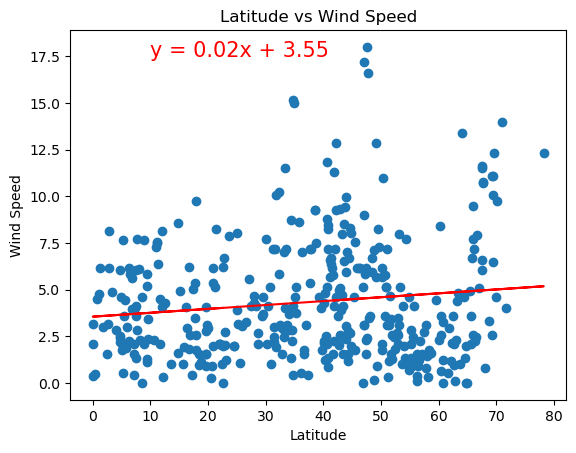

In [63]:
# Northern Hemisphere
xvalues = northern_hemi_df["Lat"]
yvalues = northern_hemi_df["Wind Speed"]
slope = linregress(xvalues, yvalues)
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(xvalues, yvalues)
plt.plot(xvalues, regress_values, "-r")
plt.annotate(line_eq,(10,17.5),fontsize=15,color="red")
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r^2-value is {rvalue}')
plt.savefig("output_data/Fig11.png")

# Show plot
plt.show()

The r^2-value is -0.21749128618867092


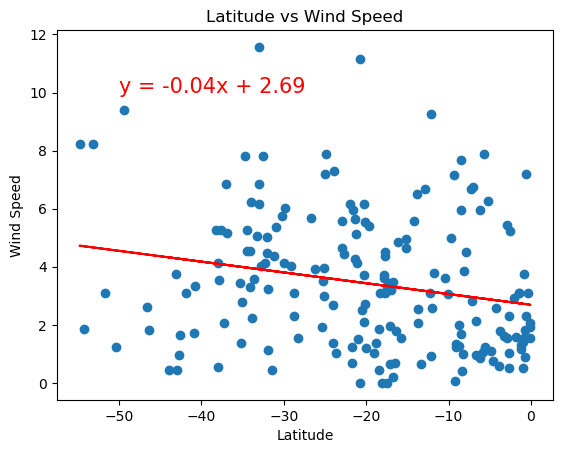

In [67]:
# Southern Hemisphere
xvalues = southern_hemi_df["Lat"]
yvalues = southern_hemi_df["Wind Speed"]
slope = linregress(xvalues, yvalues)
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(xvalues, yvalues)
plt.plot(xvalues, regress_values, "-r")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r^2-value is {rvalue}')
plt.savefig("output_data/Fig12.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE